In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load dataset
df = pd.read_csv('../data/AQI_PNQ_17_24.csv')

In [2]:
df.drop(columns=["NH3"], inplace=True)
df.dropna(inplace=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6437 entries, 0 to 8009
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6437 non-null   object 
 1   Time    6437 non-null   object 
 2   CO      6437 non-null   float64
 3   NO2     6437 non-null   float64
 4   OZONE   6437 non-null   float64
 5   PM10    6437 non-null   float64
 6   PM2.5   6437 non-null   float64
 7   SO2     6437 non-null   float64
dtypes: float64(6), object(2)
memory usage: 452.6+ KB


,Date,Time,CO,NO2,OZONE,PM10,PM2.5,SO2
0,2023-12-31,01:00:00,59.0,34.0,0.0,191.0,211.0,3.0
1,2023-12-31,02:00:00,62.0,33.0,1.0,185.0,225.0,4.0
2,2023-12-31,03:00:00,50.0,30.0,0.0,182.0,240.0,3.0
3,2023-12-31,04:00:00,52.0,27.0,0.0,176.0,247.0,3.0
6,2023-12-31,07:00:00,51.0,22.0,0.0,170.0,213.0,3.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')



# Get Mean AQI for each date
df = df.groupby('Date').median(numeric_only=True).reset_index()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    350 non-null    datetime64[ns]
 1   CO      350 non-null    float64       
 2   NO2     350 non-null    float64       
 3   OZONE   350 non-null    float64       
 4   PM10    350 non-null    float64       
 5   PM2.5   350 non-null    float64       
 6   SO2     350 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.3 KB


,Date,CO,NO2,OZONE,PM10,PM2.5,SO2
0,2023-12-31,34.5,23.5,30.0,131.0,177.0,3.0
1,2024-01-01,44.0,22.0,5.0,133.0,206.0,3.0
2,2024-01-02,36.0,18.5,0.5,130.0,134.5,3.0
3,2024-01-03,33.0,15.5,25.5,145.5,189.0,10.5
4,2024-01-04,31.0,22.5,29.0,144.5,214.0,10.0


In [4]:
# Merging aqi values from AQI Data

df_aqi = pd.read_csv('../data/AQI_PNQ_17_24_values.csv')
df_aqi.dropna(inplace=True)
df_aqi.drop(columns=['Year','Month', 'Day', 'AQI_Category_Indian_GOV'], inplace=True)
df_aqi['Date'] = pd.to_datetime(df_aqi['Date'])
df_aqi = df_aqi.sort_values(by='Date')
df = df.merge(df_aqi, on='Date', how='inner')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    350 non-null    datetime64[ns]
 1   CO      350 non-null    float64       
 2   NO2     350 non-null    float64       
 3   OZONE   350 non-null    float64       
 4   PM10    350 non-null    float64       
 5   PM2.5   350 non-null    float64       
 6   SO2     350 non-null    float64       
 7   AQI     350 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.0 KB


,Date,CO,NO2,OZONE,PM10,PM2.5,SO2,AQI
0,2023-12-31,34.5,23.5,30.0,131.0,177.0,3.0,145.0
1,2024-01-01,44.0,22.0,5.0,133.0,206.0,3.0,142.0
2,2024-01-02,36.0,18.5,0.5,130.0,134.5,3.0,141.0
3,2024-01-03,33.0,15.5,25.5,145.5,189.0,10.5,156.0
4,2024-01-04,31.0,22.5,29.0,144.5,214.0,10.0,156.0


In [5]:
# Creating Features

df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

df['AQI_N'] = df['AQI'].shift(-1)
df.dropna(inplace=True)

df.head()

,Date,CO,NO2,OZONE,PM10,PM2.5,SO2,AQI,Month,Weekday,AQI_N
0,2023-12-31,34.5,23.5,30.0,131.0,177.0,3.0,145.0,12,6,142.0
1,2024-01-01,44.0,22.0,5.0,133.0,206.0,3.0,142.0,1,0,141.0
2,2024-01-02,36.0,18.5,0.5,130.0,134.5,3.0,141.0,1,1,156.0
3,2024-01-03,33.0,15.5,25.5,145.5,189.0,10.5,156.0,1,2,156.0
4,2024-01-04,31.0,22.5,29.0,144.5,214.0,10.0,156.0,1,3,148.0


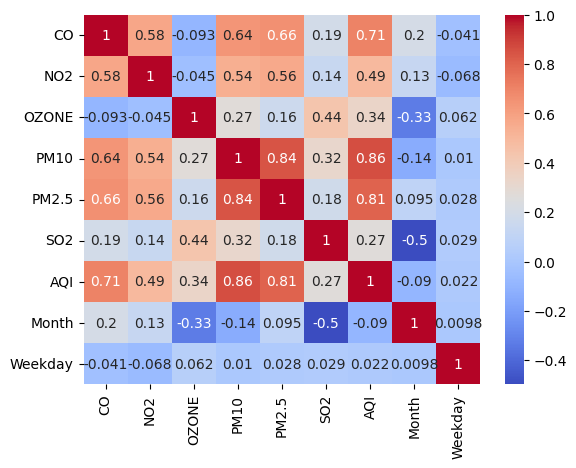

In [6]:
corrs_cols = ['CO', 'NO2','OZONE','PM10','PM2.5','SO2', 'AQI','Month','Weekday']

sns.heatmap(df[corrs_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# Lag Features brought down the perfomance



#

In [173]:
"""### CREATING LAG FEATURES ###

pollutants = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']
for col in pollutants:
    df[f'{col}_lag1'] = df[col].shift(1)
    df[f'{col}_lag2'] = df[col].shift(2)

### ROLLING AVERAGE FEATURES ###

for col in pollutants:
    df[f'{col}_rolling3'] = df[col].rolling(window=3).mean()
    df[f'{col}_rolling7'] = df[col].rolling(window=7).mean()


# Ratios and interactions
df['NO2_PM25_ratio'] = df['NO2'] / (df['PM2.5'] + 1e-5)
df['PM_ratio'] = df['PM10'] / (df['PM2.5'] + 1e-5)
# Date/time-based features

df['DayOfYear'] = df['Date'].dt.dayofyear
df['IsWeekend'] = (df['Weekday'] >= 5).astype(int)

# Drop early NaN rows from lag/rolling windows
df.dropna(inplace=True)

df.head()
"""

"### CREATING LAG FEATURES ###\n\npollutants = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']\nfor col in pollutants:\n    df[f'{col}_lag1'] = df[col].shift(1)\n    df[f'{col}_lag2'] = df[col].shift(2)\n\n### ROLLING AVERAGE FEATURES ###\n\nfor col in pollutants:\n    df[f'{col}_rolling3'] = df[col].rolling(window=3).mean()\n    df[f'{col}_rolling7'] = df[col].rolling(window=7).mean()\n\n\n# Ratios and interactions\ndf['NO2_PM25_ratio'] = df['NO2'] / (df['PM2.5'] + 1e-5)\ndf['PM_ratio'] = df['PM10'] / (df['PM2.5'] + 1e-5)\n# Date/time-based features\n\ndf['DayOfYear'] = df['Date'].dt.dayofyear\ndf['IsWeekend'] = (df['Weekday'] >= 5).astype(int)\n\n# Drop early NaN rows from lag/rolling windows\ndf.dropna(inplace=True)\n\ndf.head()\n"

In [13]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Date', 'AQI_N'])
y = df['AQI_N']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

df.head()

,Date,CO,NO2,OZONE,PM10,PM2.5,SO2,AQI,Month,Weekday,AQI_N
0,2023-12-31,34.5,23.5,30.0,131.0,177.0,3.0,145.0,12,6,142.0
1,2024-01-01,44.0,22.0,5.0,133.0,206.0,3.0,142.0,1,0,141.0
2,2024-01-02,36.0,18.5,0.5,130.0,134.5,3.0,141.0,1,1,156.0
3,2024-01-03,33.0,15.5,25.5,145.5,189.0,10.5,156.0,1,2,156.0
4,2024-01-04,31.0,22.5,29.0,144.5,214.0,10.0,156.0,1,3,148.0


In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=42, max_features='sqrt', min_samples_leaf=4, n_estimators=300, min_samples_split=2)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MAE: 10.212442420291152
MSE: 190.46115518217135
R2: 0.8647694554431177


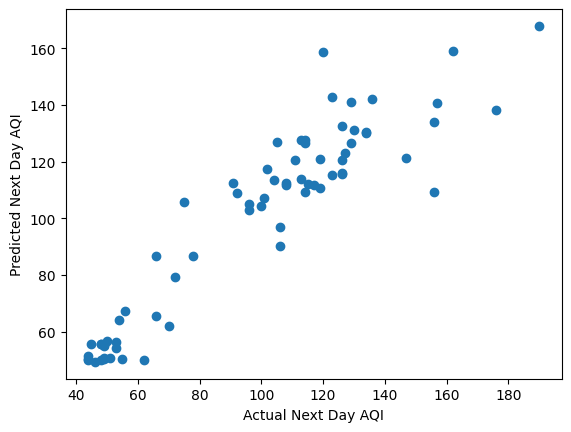

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Next Day AQI")
plt.ylabel("Predicted Next Day AQI")
plt.show()


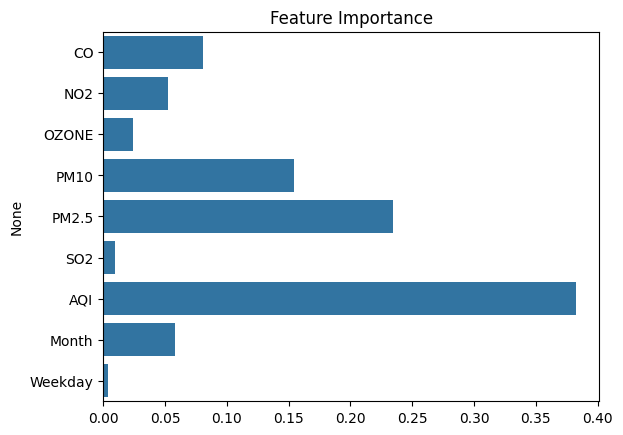

In [10]:
import seaborn as sns

importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.show()


# STRESS TEST 

## Removing the largest feature, AQI only affected the model perfomance slightly


### With AQI feature
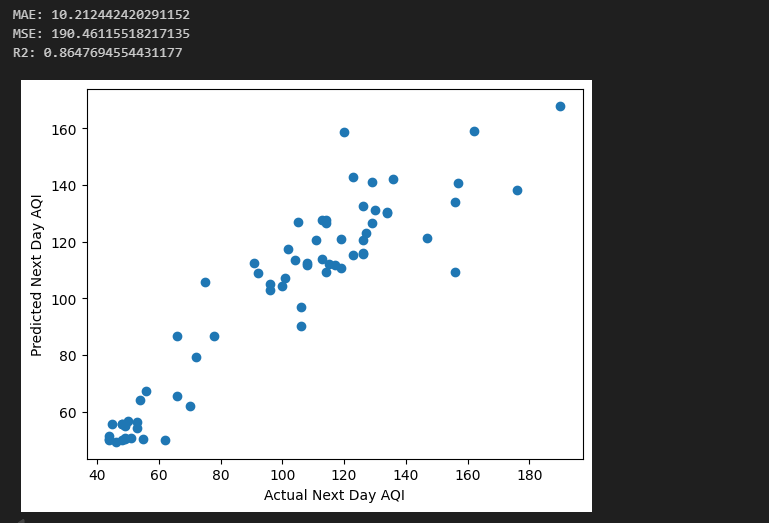


### Without AQI feature

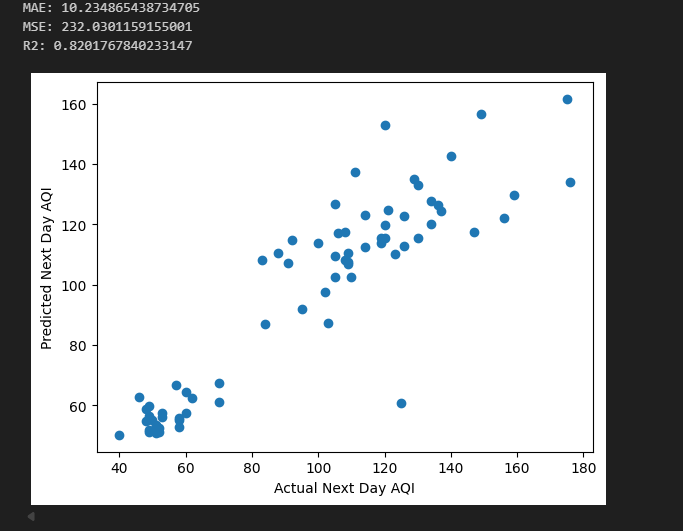

# SAVING THE MODEL

In [11]:
import pickle

with open('../model/pnq_aqi.pkl', 'wb') as f:
    pickle.dump(model, f)

## LOAD
"""
with open('aqi_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
"""

"\nwith open('aqi_rf_model.pkl', 'rb') as f:\n    loaded_model = pickle.load(f)\n"